In [1]:
from tensorflow.keras.datasets import reuters
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=None, test_split=0.2)

2113536/2110848 [==============================] - 0s 0us/step


In [3]:
X_train

array([list([1, 27595, 28842, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]),
       list([1, 3267, 699, 3434, 2295, 56, 16784, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 19261, 49, 2295, 13415, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 13415, 30625, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]),
       list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4

In [4]:
y_train

array([ 3,  4,  3, ..., 25,  3, 25])

In [5]:
max(y_train)+1

46

In [6]:
print('뉴스 기사의 최대 길이 : {}'.format(max(len(l) for l in X_train)))
print('뉴스 기사의 평균 길이 : {}'.format(sum(map(len, X_train))/len(X_train)))

뉴스 기사의 최대 길이 : 2376
뉴스 기사의 평균 길이 : 145.5398574927633


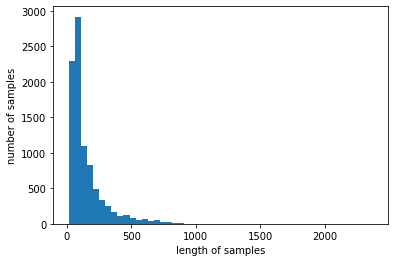

In [7]:
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

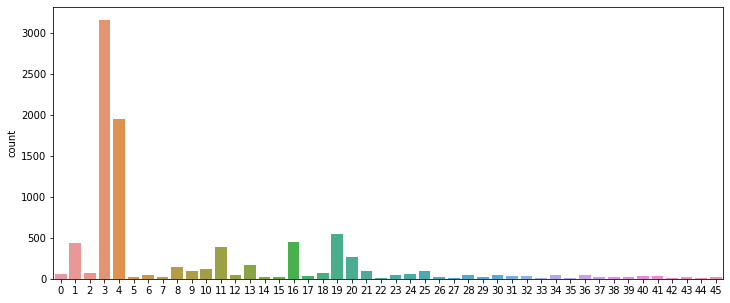

In [8]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(12,5)
sns.countplot(y_train)

In [15]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print('각 레이블에 대한 빈도수: ')
print(np.asarray((unique_elements, counts_elements)))

각 레이블에 대한 빈도수: 
[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42   43   44   45]
 [  55  432   74 3159 1949   17   48   16  139  101  124  390   49  172
    26   20  444   39   66  549  269  100   15   41   62   92   24   15
    48   19   45   39   32   11   50   10   49   19   19   24   36   30
    13   21   12   18]]


In [26]:
word_to_index = reuters.get_word_index()
word_to_index
len(word_to_index)

30979

In [0]:
index_to_word = {}
for key, value in word_to_index.items():
  index_to_word[value] = key

In [18]:
print('빈도수 상위 28842번 단어 : {}'.format(index_to_word[28842]))

빈도수 상위 28842번 단어 : nondiscriminatory


In [19]:
print(' '.join([index_to_word[X] for X in X_train[0]]))

the wattie nondiscriminatory mln loss for plc said at only ended said commonwealth could 1 traders now april 0 a after said from 1985 and from foreign 000 april 0 prices its account year a but in this mln home an states earlier and rise and revs vs 000 its 16 vs 000 a but 3 psbr oils several and shareholders and dividend vs 000 its all 4 vs 000 1 mln agreed largely april 0 are 2 states will billion total and against 000 pct dlrs


In [0]:
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [0]:
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)

In [0]:
max_len = 100
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [23]:
X_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         1,   2,   2,   8,  43,  10, 447,   5,  25, 207, 270,   5,   2,
       111,  16, 369, 186,  90,  67,   7,  89,   5,  19, 102,   6,  19,
       124,  15,  90,  67,  84,  22, 482,  26,   7,  48,   4,  49,   8,
       864,  39, 209, 154,   6, 151,   6,  83,  11,  15,  22, 155,  11,
        15,   7,  48,   9,   2,   2, 504,   6, 258,   6, 272,  11,  15,
        22, 134,  44,  11,  15,  16,   8, 197,   2,  90,  67,  52,  29,
       209,  30,  32, 132,   6, 109,  15,  17,  12], dtype=int32)

In [0]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [25]:
X_train.shape

(8982, 100)

In [0]:
model = Sequential()
model.add(Embedding(1000, 120))
model.add(LSTM(120))
model.add(Dense(46, activation='softmax'))

In [0]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [30]:
history = model.fit(X_train, y_train, batch_size=128, epochs=30, callbacks=[es,mc], validation_data=(X_test, y_test))


Epoch 1/30
71/71 [==============================] - ETA: 0s - loss: 2.6142 - acc: 0.3417
Epoch 00001: val_acc improved from -inf to 0.41897, saving model to best_model.h5
71/71 [==============================] - 25s 347ms/step - loss: 2.6142 - acc: 0.3417 - val_loss: 2.2270 - val_acc: 0.4190
Epoch 2/30
71/71 [==============================] - ETA: 0s - loss: 2.0310 - acc: 0.4834
Epoch 00002: val_acc improved from 0.41897 to 0.49911, saving model to best_model.h5
71/71 [==============================] - 24s 341ms/step - loss: 2.0310 - acc: 0.4834 - val_loss: 2.0235 - val_acc: 0.4991
Epoch 3/30
71/71 [==============================] - ETA: 0s - loss: 1.8537 - acc: 0.5167
Epoch 00003: val_acc improved from 0.49911 to 0.55165, saving model to best_model.h5
71/71 [==============================] - 24s 345ms/step - loss: 1.8537 - acc: 0.5167 - val_loss: 1.7567 - val_acc: 0.5516
Epoch 4/30
71/71 [==============================] - ETA: 0s - loss: 1.7065 - acc: 0.5581
Epoch 00004: val_acc did n

NameError: ignored

In [0]:
data=(X_test, y_test)

In [32]:
loaded_model =load_model('best_model.h5')
print('\n 테스트 정확도: %.4f' %(loaded_model.evaluate(X_test, y_test)[1]))

71/71 [==============================] - 2s 29ms/step - loss: 1.2325 - acc: 0.7159

 테스트 정확도: 0.7159


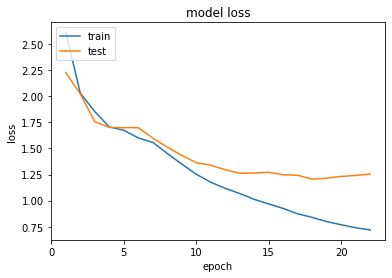

In [33]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()